In [1]:
# Preparação dos dados
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sns.set_theme()

In [2]:
## Importar dataset

data_path = '../data/' if os.path.exists(
    '../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/prepared/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente númerico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4914 non-null   int64
 1   mês                                        4914 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64
 4   cpes_domestico_baixa_tensao                4914 non-null   int64
 5   cpes_domestico_alta_tensao                 4914 non-null   int64
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64
 9   cpes_outros_baixa_tensao                   4914 non-null   int64
 10  cpes_outros_alta_tensao                    4914 

### Separar os datasets em dois:
    - Um para baixa e outro para alta tensão

In [4]:
# Selecionar as variáveis de baixa tensão
baixa_tensao_columns = ['ano', 'mês', 'energia_ativa_baixa_tensao_kwh', 
                        'cpes_domestico_baixa_tensao', 'cpes_iluminacao_publica_baixa_tensao',
                        'cpes_nao_domestico_baixa_tensao', 'cpes_outros_baixa_tensao',
                        'cpes_mobilidade_eletrica_nao_baixa_tensao', 'cpes_mobilidade_eletrica_sim_baixa_tensao']

# Selecionar as variáveis de alta tensão
alta_tensao_columns = ['ano', 'mês', 'energia_ativa_alta_tensao_kwh',
                       'cpes_domestico_alta_tensao',
                       'cpes_nao_domestico_alta_tensao', 'cpes_outros_alta_tensao']

# Criar os datasets separados
baixa_tensao_df = merged_df[baixa_tensao_columns].copy()
alta_tensao_df = merged_df[alta_tensao_columns].copy()

#### Dataframe de baixa tensão

In [5]:
baixa_tensao_df.info()
baixa_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4914 non-null   int64
 1   mês                                        4914 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64
 3   cpes_domestico_baixa_tensao                4914 non-null   int64
 4   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64
 5   cpes_nao_domestico_baixa_tensao            4914 non-null   int64
 6   cpes_outros_baixa_tensao                   4914 non-null   int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  4914 non-null   int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  4914 non-null   int64
dtypes: int64(9)
memory usage: 345.6 KB


,ano,mês,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,2022.777778,7.166667,6.473418e+06,18802.326414,214.084046,4241.061661,128.958079,27020.995319,9.315832
std,0.532924,3.625129,1.161919e+07,29402.960918,194.120963,6870.529538,206.186626,45854.018577,24.622134
min,2022.000000,1.000000,1.390660e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000
25%,2022.000000,4.000000,1.269620e+06,4581.000000,91.000000,1101.000000,21.000000,6044.000000,2.000000
50%,2023.000000,8.000000,2.618006e+06,8936.000000,141.000000,1989.500000,54.000000,11336.000000,2.000000
75%,2023.000000,10.000000,7.045592e+06,21427.000000,280.000000,4897.250000,157.000000,29565.500000,6.000000
max,2024.000000,12.000000,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,528158.000000,382.000000


In [6]:
# Verificar valores vazios
nulls = baixa_tensao_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 0


#### Guardar dataset de baixa tensão

In [7]:
file_path = data_path + 'treated/prepared/numeric/dataset-numeric-low-tension.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/dataset-numeric-low-tension.csv


#### Dataframe de alta tensão

In [8]:
alta_tensao_df.info()
alta_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   ano                             4914 non-null   int64
 1   mês                             4914 non-null   int64
 2   energia_ativa_alta_tensao_kwh   4914 non-null   int64
 3   cpes_domestico_alta_tensao      4914 non-null   int64
 4   cpes_nao_domestico_alta_tensao  4914 non-null   int64
 5   cpes_outros_alta_tensao         4914 non-null   int64
dtypes: int64(6)
memory usage: 230.5 KB


,ano,mês,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4914.000000,4914.000000,4.914000e+03,4914.000000,4914.000000,4914.000000
mean,2022.777778,7.166667,6.872585e+06,0.040090,95.435694,0.385836
std,0.532924,3.625129,1.423193e+07,0.209242,121.195235,4.184540
min,2022.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2022.000000,4.000000,4.162925e+05,0.000000,28.000000,0.000000
50%,2023.000000,8.000000,1.837661e+06,0.000000,51.000000,0.000000
75%,2023.000000,10.000000,5.952910e+06,0.000000,119.000000,0.000000
max,2024.000000,12.000000,1.279470e+08,2.000000,1226.000000,75.000000


In [9]:
# Verificar valores vazios
nulls = alta_tensao_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 20


#### Guardar dataset de alta tensão

In [10]:
file_path = data_path + 'treated/prepared/numeric/dataset-numeric-high-tension.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/dataset-numeric-high-tension.csv


### Criar dois subsets dentro de cada dataset de nivel de tensao

#### Criar o subset de teste (Dados de 2024)

In [11]:
# Filtrar o DataFrame para obter os valores de 2024
baixa_tensao_2024_df = baixa_tensao_df[(baixa_tensao_df['ano'] == 2024)].copy()

baixa_tensao_2024_df.info()
baixa_tensao_2024_df.describe()

# Filtrar o DataFrame para obter os valores de 2024
alta_tensao_2024_df = alta_tensao_df[(alta_tensao_df['ano'] == 2024)].copy()

alta_tensao_2024_df.info()
alta_tensao_2024_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 17 to 4913
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        273 non-null    int64
 1   mês                                        273 non-null    int64
 2   energia_ativa_baixa_tensao_kwh             273 non-null    int64
 3   cpes_domestico_baixa_tensao                273 non-null    int64
 4   cpes_iluminacao_publica_baixa_tensao       273 non-null    int64
 5   cpes_nao_domestico_baixa_tensao            273 non-null    int64
 6   cpes_outros_baixa_tensao                   273 non-null    int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  273 non-null    int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  273 non-null    int64
dtypes: int64(9)
memory usage: 21.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 17 to 4913
Data columns (total 6

,ano,mês,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,273.0,273.0,2.730000e+02,273.000000,273.000000,273.0
mean,2024.0,1.0,1.528861e+06,0.047619,96.366300,0.0
std,0.0,0.0,2.761528e+06,0.245406,122.724874,0.0
min,2024.0,1.0,0.000000e+00,0.000000,0.000000,0.0
25%,2024.0,1.0,1.234420e+05,0.000000,29.000000,0.0
50%,2024.0,1.0,5.144380e+05,0.000000,52.000000,0.0
75%,2024.0,1.0,1.654728e+06,0.000000,119.000000,0.0
max,2024.0,1.0,2.596288e+07,2.000000,1226.000000,0.0


Ver nulls e duplicados

In [12]:
# Verificar valores vazios
nulls = baixa_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 0


In [13]:
# Verificar valores vazios
nulls = alta_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 3


##### Guardar subset de teste (2024)

In [14]:
file_path = data_path + 'treated/prepared/numeric/test/dataset-numeric-low-tension-2024.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/test/dataset-numeric-low-tension-2024.csv


In [15]:
file_path = data_path + 'treated/prepared/numeric/test/dataset-numeric-high-tension-2024.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/test/dataset-numeric-high-tension-2024.csv


#### Criar o subset de treino (Dados 2022, 2023)

In [16]:
# Filtrar o DataFrame para obter os valores que não são de 2024
baixa_tensao_outros_df = baixa_tensao_df[(baixa_tensao_df['ano'] != 2024)].copy()

baixa_tensao_outros_df.info()
baixa_tensao_outros_df.describe()

# Filtrar o DataFrame para obter os valores que não são de 2024
alta_tensao_outros_df = alta_tensao_df[(alta_tensao_df['ano'] != 2024)].copy()

alta_tensao_outros_df.info()
alta_tensao_outros_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4912
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4641 non-null   int64
 1   mês                                        4641 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4641 non-null   int64
 3   cpes_domestico_baixa_tensao                4641 non-null   int64
 4   cpes_iluminacao_publica_baixa_tensao       4641 non-null   int64
 5   cpes_nao_domestico_baixa_tensao            4641 non-null   int64
 6   cpes_outros_baixa_tensao                   4641 non-null   int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  4641 non-null   int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  4641 non-null   int64
dtypes: int64(9)
memory usage: 362.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4912
Data columns (total 

,ano,mês,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4641.000000,4641.000000,4.641000e+03,4641.000000,4641.000000,4641.000000
mean,2022.705882,7.529412,7.186922e+06,0.039647,95.380952,0.408533
std,0.455694,3.397902,1.456843e+07,0.206940,121.117813,4.304804
min,2022.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2022.000000,5.000000,4.570540e+05,0.000000,28.000000,0.000000
50%,2023.000000,8.000000,1.955336e+06,0.000000,51.000000,0.000000
75%,2023.000000,10.000000,6.360625e+06,0.000000,119.000000,0.000000
max,2023.000000,12.000000,1.279470e+08,2.000000,1224.000000,75.000000


Ver nulls e duplicados

In [17]:
# Verificar valores vazios
nulls = baixa_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 0


In [18]:
# Verificar valores vazios
nulls = alta_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 17


##### Guardar subset de treino (2022 e 2023)

In [19]:
file_path = data_path + 'treated/prepared/numeric/train/dataset-numeric-low-tension-2022-2023.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/train/dataset-numeric-low-tension-2022-2023.csv


In [20]:
file_path = data_path + 'treated/prepared/numeric/train/dataset-numeric-high-tension-2022-2023.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/train/dataset-numeric-high-tension-2022-2023.csv


### Guardar versões dos datasets sem a coluna ano e mês pois estas não têm boa correlação e por isso não têm interesse na análise

In [21]:
merged_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-both-tensions-no-dates.csv'

merged_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-both-tensions-no-dates.csv


In [22]:
baixa_tensao_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-no-dates.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-no-dates.csv


In [23]:
baixa_tensao_2024_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-test-no-dates.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-test-no-dates.csv


In [24]:
baixa_tensao_outros_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-train-no-dates.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-train-no-dates.csv


In [25]:
alta_tensao_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-no-dates.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-no-dates.csv


In [26]:
alta_tensao_2024_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-test-no-dates.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-test-no-dates.csv


In [27]:
alta_tensao_outros_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-train-no-dates.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-train-no-dates.csv


## Normalização MinMax

### Normalização MinMax das baixas tensões

In [36]:
# Normalização com o MinMax
scaler = MinMaxScaler()
baixa_tensao_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_df), columns=baixa_tensao_df.columns)

baixa_tensao_scaled_min_max_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,0.035328,0.061788,0.242784,0.051923,0.037529,0.039942,0.005236
1,0.031719,0.061820,0.242784,0.051836,0.036613,0.040705,0.005236
2,0.032404,0.061852,0.242784,0.051723,0.036613,0.041710,0.005236
3,0.034943,0.061888,0.242784,0.051798,0.036156,0.043251,0.005236
4,0.040670,0.061907,0.243633,0.051848,0.037071,0.044166,0.005236


In [38]:
# Estatísticas resumidas antes da normalização
baixa_tensao_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,6.473418e+06,18802.326414,214.084046,4241.061661,128.958079,27020.995319,9.315832
std,1.161919e+07,29402.960918,194.120963,6870.529538,206.186626,45854.018577,24.622134
min,1.390660e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000
25%,1.269620e+06,4581.000000,91.000000,1101.000000,21.000000,6044.000000,2.000000
50%,2.618006e+06,8936.000000,141.000000,1989.500000,54.000000,11336.000000,2.000000
75%,7.045592e+06,21427.000000,280.000000,4897.250000,157.000000,29565.500000,6.000000
max,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,528158.000000,382.000000


In [39]:
# Estatísticas resumidas antes da normalização
baixa_tensao_scaled_min_max_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,0.038804,0.057101,0.175793,0.050959,0.058562,0.049101,0.024387
std,0.071178,0.094534,0.164789,0.086086,0.094365,0.087007,0.064456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006926,0.011378,0.071307,0.011615,0.009153,0.009298,0.005236
50%,0.015186,0.025380,0.113752,0.022748,0.024256,0.019339,0.005236
75%,0.042309,0.065540,0.231749,0.059181,0.071396,0.053929,0.015707
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


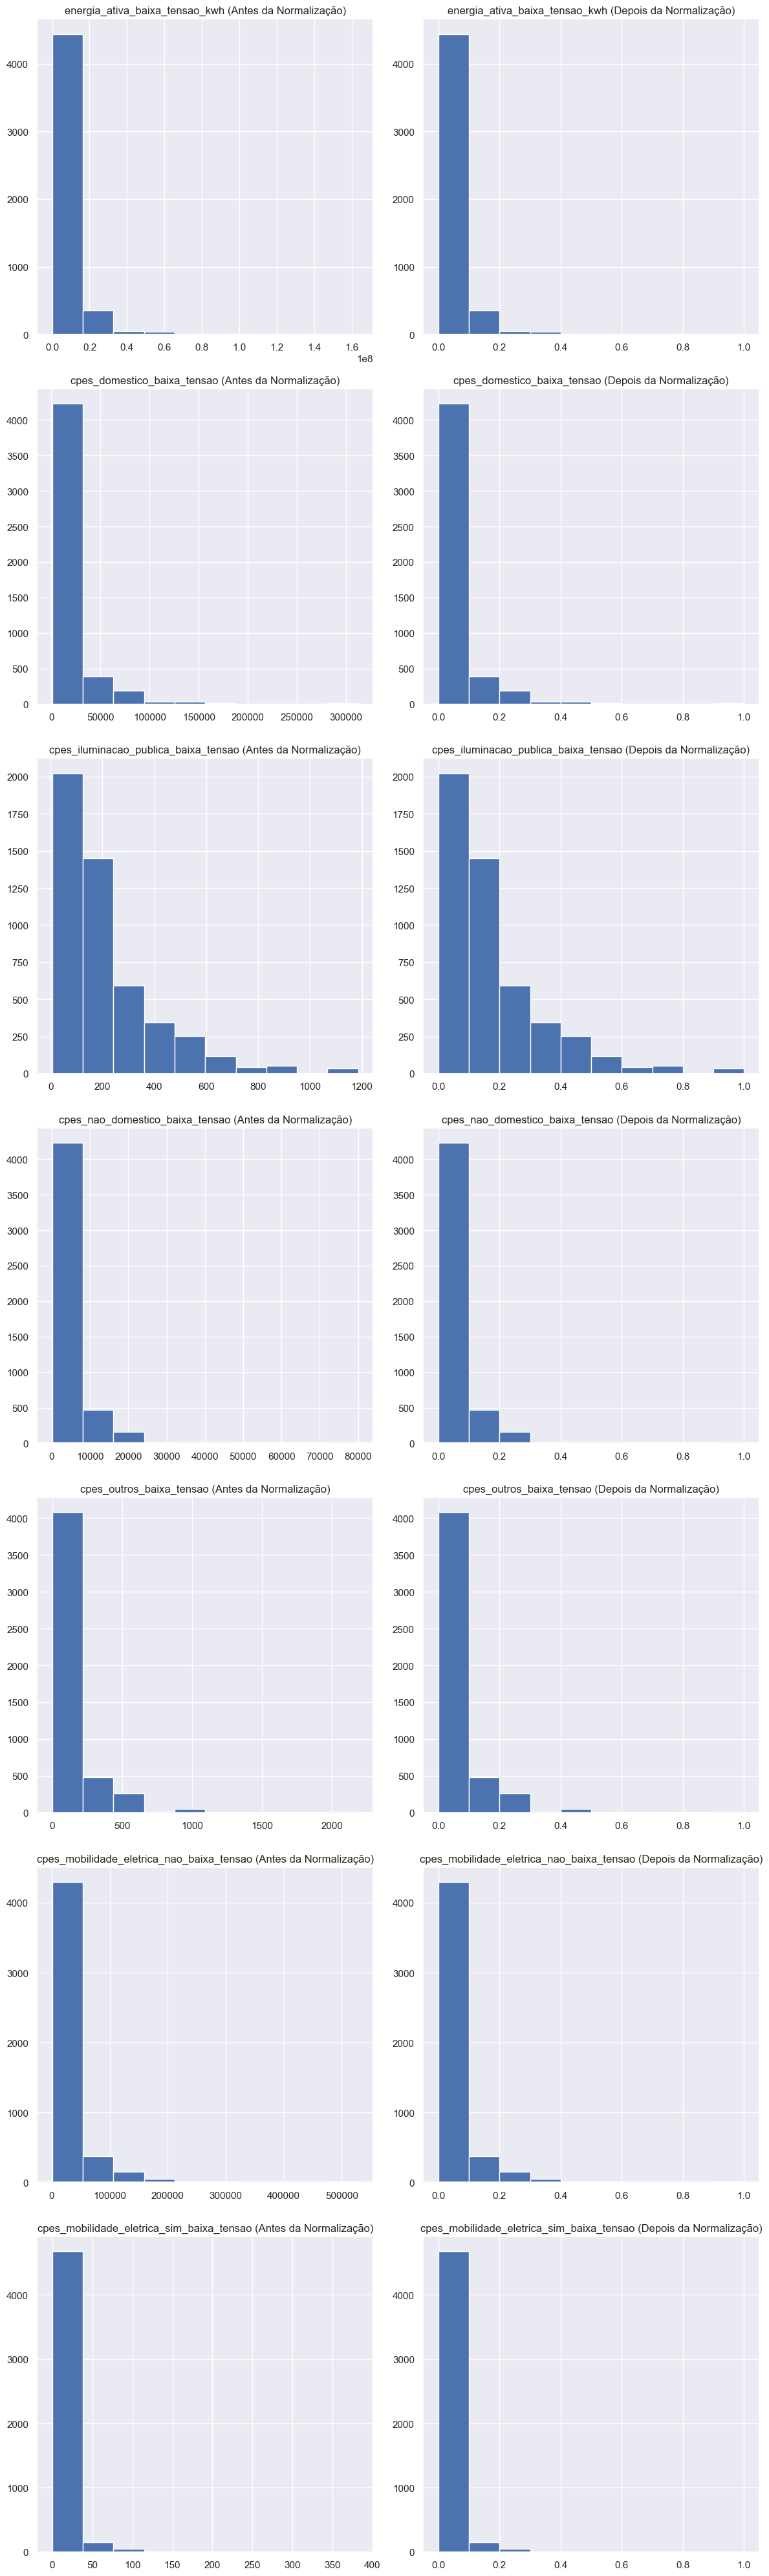

In [37]:
# Criar subplots
fig, axes = plt.subplots(nrows=len(baixa_tensao_df.columns), ncols=2, figsize=(12, 40))

num_bins = 10
# Histogramas antes da normalização
for i, col in enumerate(baixa_tensao_df.columns):
    merged_df[col].hist(ax=axes[i, 0], bins=num_bins)
    axes[i, 0].set_title(col + ' (Antes da Normalização)')

# Histogramas depois da normalização
for i, col in enumerate(baixa_tensao_scaled_min_max_df.columns):
    baixa_tensao_scaled_min_max_df[col].hist(ax=axes[i, 1], bins=num_bins)
    axes[i, 1].set_title(col + ' (Depois da Normalização)')

plt.tight_layout()
plt.show()


## Normalizar z-Score

In [31]:
# Normalizando utilizando o Z-Score
scaler = StandardScaler()
merged_df_scaled_z_score = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

merged_df_scaled_z_score.head()

,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,-0.048836,-0.068940,0.049581,-0.191613,0.406571,0.011199,0.318232,-0.222918,-0.092215,-0.105279,-0.297154
1,-0.099547,-0.050137,0.049921,-0.191613,0.406571,0.010181,0.318232,-0.232619,-0.092215,-0.096512,-0.297154
2,-0.089920,-0.035976,0.050261,-0.191613,0.406571,0.008870,0.318232,-0.232619,-0.092215,-0.084952,-0.297154
3,-0.054239,-0.064047,0.050635,-0.191613,0.406571,0.009744,0.318232,-0.237470,-0.092215,-0.067242,-0.297154
4,0.026228,-0.112463,0.050839,-0.191613,0.411723,0.010326,0.318232,-0.227769,-0.092215,-0.056729,-0.297154


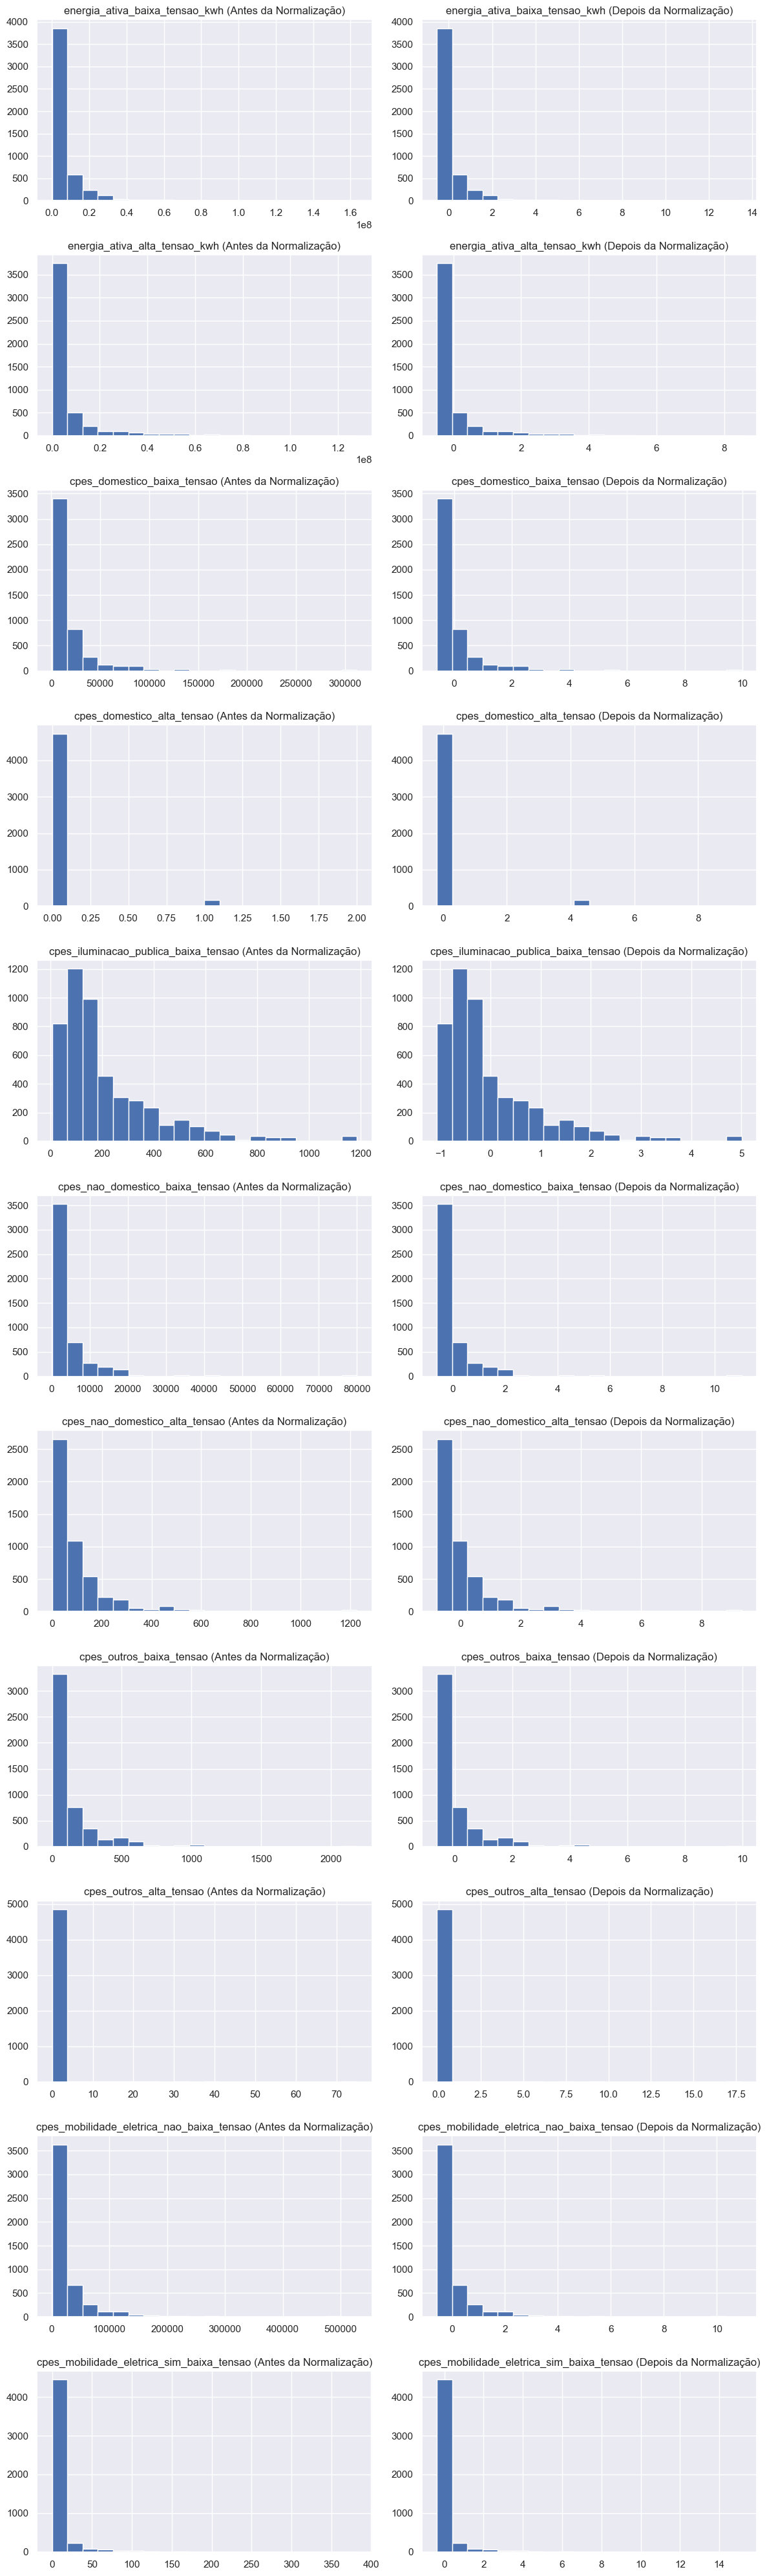

In [32]:
# Criar subplots
fig, axes = plt.subplots(nrows=len(merged_df.columns), ncols=2, figsize=(12, 40))

# Histogramas antes da normalização
for i, col in enumerate(merged_df.columns):
    merged_df[col].hist(ax=axes[i, 0], bins=20)
    axes[i, 0].set_title(col + ' (Antes da Normalização)')

# Histogramas depois da normalização
for i, col in enumerate(merged_df_scaled_z_score.columns):
    merged_df_scaled_z_score[col].hist(ax=axes[i, 1], bins=20)
    axes[i, 1].set_title(col + ' (Depois da Normalização)')

plt.tight_layout()
plt.show()


In [33]:
# Estatísticas resumidas antes da normalização
merged_df.describe()

,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.914000e+03,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,6.473418e+06,6.872585e+06,18802.326414,0.040090,214.084046,4241.061661,95.435694,128.958079,0.385836,27020.995319,9.315832
std,1.161919e+07,1.423193e+07,29402.960918,0.209242,194.120963,6870.529538,121.195235,206.186626,4.184540,45854.018577,24.622134
min,1.390660e+05,0.000000e+00,1042.000000,0.000000,7.000000,174.000000,0.000000,1.000000,0.000000,1144.000000,0.000000
25%,1.269620e+06,4.162925e+05,4581.000000,0.000000,91.000000,1101.000000,28.000000,21.000000,0.000000,6044.000000,2.000000
50%,2.618006e+06,1.837661e+06,8936.000000,0.000000,141.000000,1989.500000,51.000000,54.000000,0.000000,11336.000000,2.000000
75%,7.045592e+06,5.952910e+06,21427.000000,0.000000,280.000000,4897.250000,119.000000,157.000000,0.000000,29565.500000,6.000000
max,1.633807e+08,1.279470e+08,312074.000000,2.000000,1185.000000,79984.000000,1226.000000,2186.000000,75.000000,528158.000000,382.000000


In [34]:
# Estatísticas resumidas depois da normalização
merged_df_scaled_min_max.describe()

,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,0.038804,0.053714,0.057101,0.020045,0.175793,0.050959,0.077843,0.058562,0.005144,0.049101,0.024387
std,0.071178,0.111233,0.094534,0.104621,0.164789,0.086086,0.098854,0.094365,0.055794,0.087007,0.064456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006926,0.003254,0.011378,0.000000,0.071307,0.011615,0.022838,0.009153,0.000000,0.009298,0.005236
50%,0.015186,0.014363,0.025380,0.000000,0.113752,0.022748,0.041599,0.024256,0.000000,0.019339,0.005236
75%,0.042309,0.046526,0.065540,0.000000,0.231749,0.059181,0.097064,0.071396,0.000000,0.053929,0.015707
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
